In [1]:
import numpy as np 
import os 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
X = np.load('archive/X.npy')
y = np.load('archive/Y.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'archive/X.npy'

In [3]:
X = X.reshape(-1,64,64,1)

print("X Shape:",X.shape)
print("Y Shape:",y.shape)

NameError: name 'X' is not defined

NameError: name 'X' is not defined

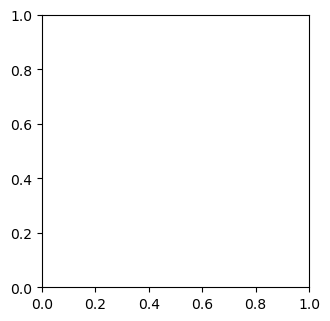

In [4]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(top = 2, bottom = 1)
    plt.imshow(X[j].reshape(64,64))
    plt.title(np.argmax(y[j]))
    plt.axis('off')

In [5]:
X_organized = np.concatenate((X[204:409,:],
                              X[822:1028,:],
                              X[1649:1855,:],
                              X[1443:1649,:],
                              X[1236:1443,:],
                              X[1855:2062,:],
                              X[615:822,:],
                              X[409:615,:],
                              X[1028:1236,:],
                              X[0:204,:]),axis = 0)

NameError: name 'X' is not defined

NameError: name 'X_organized' is not defined

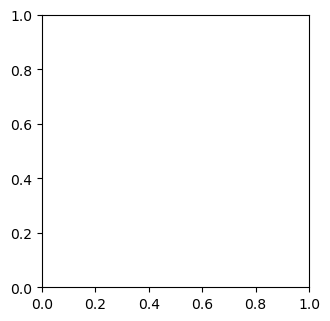

In [6]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(top = 2, bottom = 1)
    plt.imshow(X_organized[j].reshape(64,64))
    plt.title(np.argmax(y[j]))
    plt.axis('off')

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_organized,y,test_size = 0.2,random_state = 42)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

NameError: name 'X_organized' is not defined

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-03-15 22:55:57.294812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
def show_new_samples(new_images):
    plt.figure(figsize=(20,6))
    for i in range(10):
        plt.subplot(2,5,i+1)
        image = new_images.next()
        plt.imshow(image[0].reshape(64,64))
        plt.axis('off')
    
    plt.show()

In [10]:
datagen = ImageDataGenerator(zoom_range = 0.5)
new_images = datagen.flow(x_train,batch_size = 250)
show_new_samples(new_images)

NameError: name 'x_train' is not defined

In [11]:
datagen = ImageDataGenerator(rotation_range = 45)
new_images = datagen.flow(x_train,batch_size = 250)
show_new_samples(new_images)

NameError: name 'x_train' is not defined

In [12]:
datagen = ImageDataGenerator(zoom_range = 0.5,rotation_range = 45)
new_images = datagen.flow(x_train,batch_size = 1)
show_new_samples(new_images)

NameError: name 'x_train' is not defined

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam

In [14]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (9,9),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (7,7),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(4,4), strides=(3,3)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128 , kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation='softmax'))

2023-03-15 22:59:07.083748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 22:59:07.085203: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [15]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

/opt/intel/inteloneapi/tensorflow/latest/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
datagen = ImageDataGenerator(zoom_range = 0.5,rotation_range = 45)
datagen.fit(x_train)

NameError: name 'x_train' is not defined

In [17]:
history=model.fit(datagen.flow(x_train,y_train, batch_size=250),epochs = 100, validation_data = (x_test,y_test))

NameError: name 'x_train' is not defined

In [18]:
model.save('trained_model')

INFO:tensorflow:Assets written to: trained_model/assets


INFO:tensorflow:Assets written to: trained_model/assets
